In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Lets use glob to load in all our files in at one time.

In [2]:
# df2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
# df2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
# See the list of files
q = 'Data/final_tmdb_data_*.csv.gz'
chunked_files = sorted(glob.glob(q))
chunked_files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz']

### Lets combine these files and make one large Data Frame

In [4]:
# Create an empty list for all our dataframes
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file, index_col=0)
    df_list.append(temp_df)

# combined all the dfs into one dataframe
df_combined = pd.concat(df_list, ignore_index=True)
print("The number of rows we have is ", len(df_combined))    

The number of rows we have is  53041


### Perform cleaning

In [5]:
df_ml = df_combined.copy()

In [6]:
# Drop duplicate values
df_ml.drop_duplicates(inplace=True)
print("The number of duplicate values is : ", df_ml.duplicated().sum())

The number of duplicate values is :  0


In [7]:
df_ml['certification'].value_counts().index
# We can see that there are many typos.

Index(['R', 'PG-13', 'NR', 'PG', 'G', 'NC-17', 'Unrated', '-', 'UR',
       'Not Rated', 'ScreamFest Horror Film Festival', 'R ', 'PG-13 ', '10'],
      dtype='object')

In [8]:
df_ml = df_ml[df_ml['certification'] != 'ScreamFest Horror Film Festival']
df_ml = df_ml[df_ml['certification'] != '10']
df_ml = df_ml[df_ml['certification'] != '-']
df_ml['certification'] = df_ml['certification'].str.replace('R ', 'R')
df_ml['certification'] = df_ml['certification'].str.replace('PG-13 ', 'PG-13')
df_ml['certification'] = df_ml['certification'].replace({'NR':'UR', 'Unrated':'UR', 'Not Rated':'UR'})
df_ml['certification'].value_counts().index

Index(['R', 'PG-13', 'UR', 'PG', 'G', 'NC-17'], dtype='object')

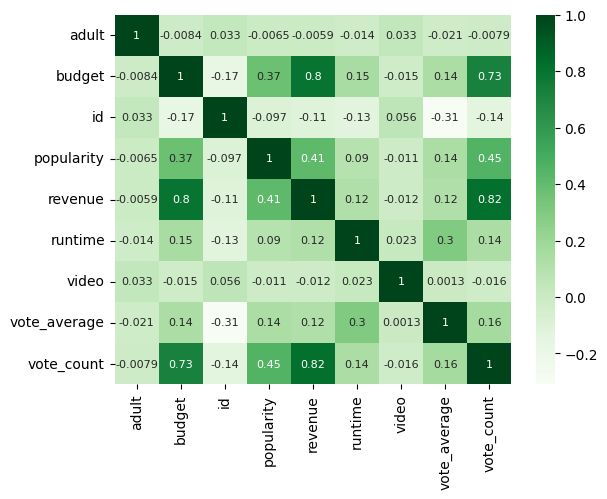

In [9]:
corr = df_ml.corr()
sns.heatmap(corr, cmap='Greens', annot=True, annot_kws={'size': 8});

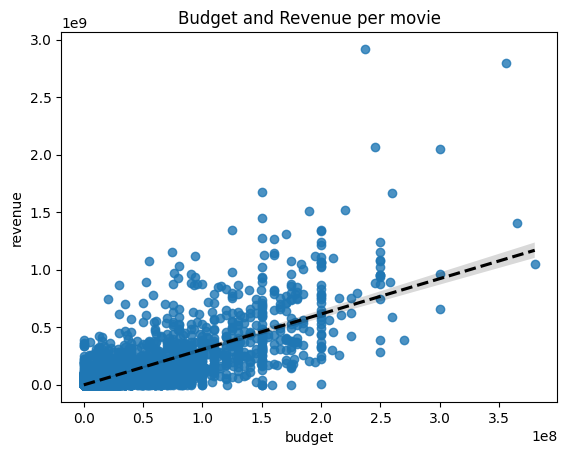

In [10]:
sns.regplot(data=df_ml, x='budget', y='revenue', line_kws={'color':'black', 'ls': '--'});
plt.title("Budget and Revenue per movie");

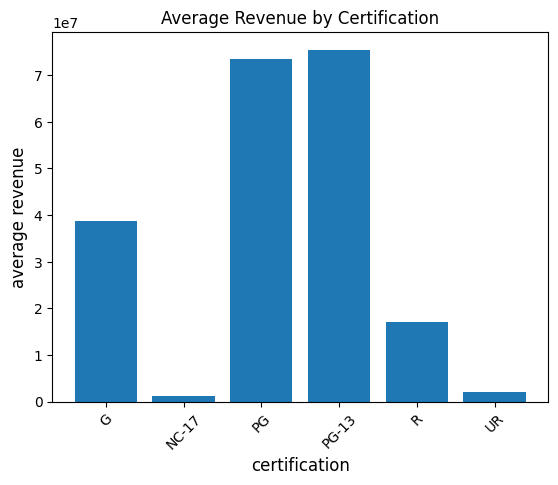

In [11]:
# What is the average revenue per certification category
temp = df_ml.groupby('certification')['revenue'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average revenue', fontsize=12)
plt.xlabel('certification', fontsize=12)
plt.title('Average Revenue by Certification');
plt.xticks(rotation = 45);

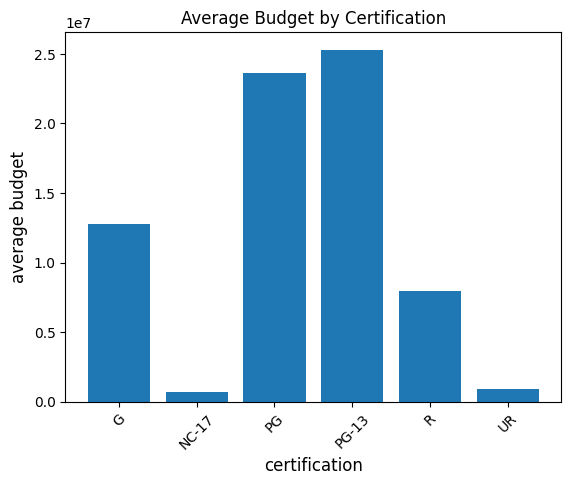

In [12]:
# What is the average budget per certification category
temp = df_ml.groupby('certification')['budget'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average budget', fontsize=12)
plt.xlabel('certification', fontsize=12)
plt.title('Average Budget by Certification');
plt.xticks(rotation = 45);

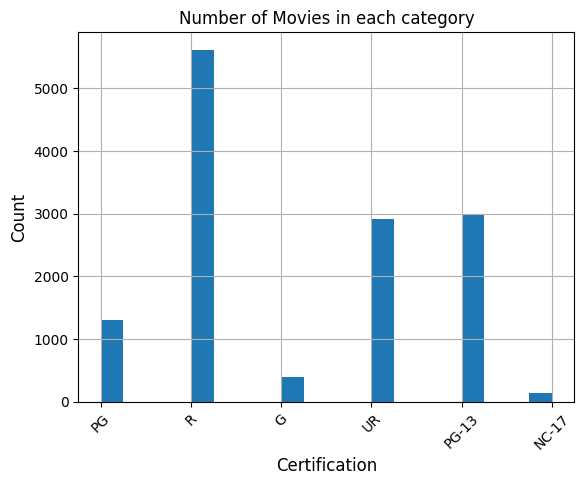

In [13]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)
df_ml['certification'].hist(bins=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Certification', fontsize=12)
plt.title('Number of Movies in each category');
plt.xticks(rotation = 45);

In [14]:
# Save current merged dataframe to a file.
df_ml.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip',index=False)
print('Done!')

Done!
